In [1]:
using LinearAlgebra

#Previous implementation of wolfe and steepest descent from problem 2

function wolfe(x,p)
    a = 1
    change = 0.75
    c = 0.1
    d = 0.9
    while (f(x + a*p) > f(x) + c*a*transpose(p) * ∇f(x)) || transpose(p) * ∇f(x + a*p) > d * transpose(p) * ∇f(x)
        #Sufficient decrease and curvature condition
        a = change * a
    end
    return a
end

function steepest_descent(f, ∇f, x; ϵ=1e-1, k=10)
    i = 1
    while norm(∇f(x)) > ϵ
        p = -∇f(x)   # steepest descent direction
        α = wolfe(x,p)
        x[1] = x[1] + α*p[1]  # the new iterate
        x[2] = x[2] + α*p[2]
        i % k == 0 && println(" iteration ", i, ". x1 = ", x[1], ". x2 = ", x[2])
        i += 1
    end
    return x
end

steepest_descent (generic function with 1 method)

In [29]:
function cholesky_plus(∇2)
    beta = 0.01
    t = 0
    while (true)
        try
            return cholesky(∇2 + t*I)
        catch e
            t = max(2*t, beta)
        end
    end
end

function newton_method(x)
    i = 1
    while norm(∇f(x)) > 1e-1
        F = cholesky_plus(∇2f(x))
        y = F.L\∇f(x)
        p = transpose(F.L)\y
        α = 1
        x[1] = x[1] - α*p[1]  # the new iterate
        x[2] = x[2] - α*p[2]
        println("iteration ", i, ". step_size = ", α,". x = ", x)
        i += 1
    end
    return x
end

newton_method (generic function with 1 method)

In [33]:
using DataFrames, CSV, LinearAlgebra
using GLM, StatsModels, Plots

A = [19,2,9,4,5,6,3,11,14,17,1,20]   # number of units
b = [7.9,25,13.1,17.4,19.5,13,17.8,8,9.2,6.3,42,6.6]  # cost

function f(x)
    sum( (b - x[1]*A.^x[2] ).^2 )
end

function ∇f(x)
    [sum(-2 * (b - x[1]*A.^x[2]) .* (A.^x[2]));
     sum(-2 * (b - x[1]*A.^x[2]) .* (x[1] * A.^x[2]) .* log.(A))]
end

function ∇2f(x)
    [2 * sum(A.^(2 * x[2]));
    -2 * sum(b .* A.^x[2] .* log.(A) - 2 * x[1] .* A.^(2 * x[2]) .* log.(A));;
        
    -2 * sum(b .* A.^x[2] .* log.(A) - 2 * x[1] .* A.^(2 * x[2]) .* log.(A));
    -2 * sum(b .* x[1] .* log.(A).^2 .* A.^x[2] - 2 * x[1]^2 .* log.(A).^2 .* A.^(2 * x[2]))]
end 

∇2f (generic function with 1 method)

In [35]:
x = [30.0,-1.6]
x_sd = steepest_descent(f, ∇f, x, k=100)

 iteration 100. x1 = 30.925386591577446. x2 = -0.4502944932810651
 iteration 200. x1 = 31.98289106994944. x2 = -0.4680582658108027
 iteration 300. x1 = 32.91892676529238. x2 = -0.48392602217356656
 iteration 400. x1 = 33.337641892259725. x2 = -0.4894681440156404
 iteration 500. x1 = 34.11115147533879. x2 = -0.5027103758783075
 iteration 600. x1 = 34.87827433741816. x2 = -0.512341872118332
 iteration 700. x1 = 35.41697166429488. x2 = -0.522183887073443
 iteration 800. x1 = 35.918068974424756. x2 = -0.5299436676386848
 iteration 900. x1 = 36.335610260233935. x2 = -0.5373119564869684
 iteration 1000. x1 = 36.725337742123294. x2 = -0.543804283514457
 iteration 1100. x1 = 37.07692730687262. x2 = -0.5495297693903839
 iteration 1200. x1 = 37.4039695371483. x2 = -0.552893334480433
 iteration 1300. x1 = 37.66957043076477. x2 = -0.5580134693268247
 iteration 1400. x1 = 37.90989577108044. x2 = -0.5608982564115425
 iteration 1500. x1 = 38.12774231883574. x2 = -0.5642536374351094
 iteration 1600. x

2-element Vector{Float64}:
 40.64901328025751
 -0.6018226232835026

In [39]:
#x = [40.6, -0.5]
x = [30.0, -1.6] #An originally not positive definite point
println("Positive definite: ", isposdef(∇2f(x)))
x_nm = newton_method(x)

Positive definite: false
iteration 1. step_size = 1. x = [30.059483356886233, 0.13408034468319108]
iteration 2. step_size = 1. x = [22.06979117055731, 0.06925105214965738]
iteration 3. step_size = 1. x = [53.65262964489111, -0.6609974834450609]
iteration 4. step_size = 1. x = [38.57891596350365, -0.5745940221573527]
iteration 5. step_size = 1. x = [40.65436222495975, -0.6023334400033931]
iteration 6. step_size = 1. x = [40.68828224195532, -0.6023934059653515]


2-element Vector{Float64}:
 40.68828224195532
 -0.6023934059653515

Obviously, as we have seen many times before, newton's method requires way less iterations of searching to find the result. However, for lots of cases, the newton's method with cholesky factorization fails because the computed Hessian is not positive definite at those points. But the cholesky_plus function takes care and resolves those cases. I have noticed that steepest descent slowly approaches the solution whereas newton's method jumps around and takes larger strides towards the solution. 

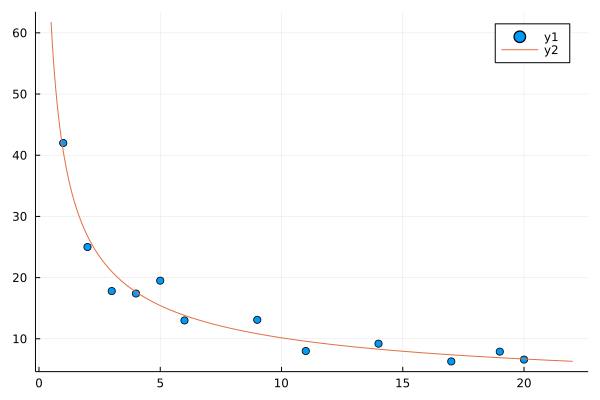

In [22]:
#Estimated Newton's Method graph
i(x) = x_nm[1]*x^(x_nm[2])
x = range(0.5, 22, length=10000)
h = scatter(A,b)
plot(h)
plot!(x, i.(x))